In [2]:
from glob import glob
from datetime import timedelta

from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_4048/513717696.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [9]:
glob("/Users/hj/Downloads/app_review_data")

['/Users/hj/Downloads/app_review_data']

In [10]:
def extract_csvs():
    res = []
    for path in tqdm(glob("/Users/hj/Downloads/app_review_data")):
        app_name = path.split("/")[-1].replace(".csv", "")
        df_temp = pd.read_csv(path)
        df_temp = df_temp.assign(app_name=app_name)
        res.append(df_temp)
    df = pd.concat(res)
    return df

In [11]:
df = extract_csvs()

  0%|          | 0/1 [00:00<?, ?it/s]


IsADirectoryError: [Errno 21] Is a directory: '/Users/hj/Downloads/app_review_data'

In [27]:
df.head()

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp,app_name,author_id,review_datetime_utc
0,0.0,ff27dd54-d785-418f-998c-8c2e01351201,232289234882626103787,VI*******AR,Very nice 👍,5.0,0,2.21.23.23,2021-11-25 03:12:29,WHATSAPP_REVIEWS,NaN,NaN
1,1.0,08e30530-c0fe-4a94-86d3-cc2ddb08b66b,165667818870073259663,Ha************an,Very nice 👌,5.0,0,2.21.10.16,2021-11-25 03:12:37,WHATSAPP_REVIEWS,NaN,NaN
2,2.0,f6077a17-bcc3-4445-b23e-15d292f217b9,235241404052650920045,Ar******77,Phaltu aap,1.0,0,2.21.21.19,2021-11-25 03:12:55,WHATSAPP_REVIEWS,NaN,NaN
3,3.0,6ac91332-f85e-488f-8538-3d50f803f22b,217415827699074437622,Na************* U,Gg,5.0,0,2.21.10.16,2021-11-25 03:12:59,WHATSAPP_REVIEWS,NaN,NaN
4,4.0,8eaf12b4-386e-4ca3-a5b4-6dd45e051b54,326804115988587106741,or*****************ne,É o Melhor aplicativo do mundo,5.0,0,2.21.22.26,2021-11-25 03:12:59,WHATSAPP_REVIEWS,NaN,NaN


In [31]:
df.review_rating.value_counts()

5.0    17783765
1.0     4892198
4.0     3125902
3.0     1446163
2.0      905889
0.0         459
Name: review_rating, dtype: int64

In [30]:
df.review_rating.sort_values()

5999       0.0
6389       0.0
5249       0.0
6394       0.0
5246       0.0
          ... 
1589056    NaN
1627080    NaN
1674542    NaN
1686933    NaN
1693901    NaN
Name: review_rating, Length: 28154385, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28154385 entries, 0 to 3465865
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           float64
 1   review_id            object 
 2   pseudo_author_id     object 
 3   author_name          object 
 4   review_text          object 
 5   review_rating        float64
 6   review_likes         int64  
 7   author_app_version   object 
 8   review_timestamp     object 
 9   app_name             object 
 10  author_id            object 
 11  review_datetime_utc  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.7+ GB


In [6]:
df.isna().mean()

Unnamed: 0             1.457340e-01
review_id              2.997116e-01
pseudo_author_id       2.997116e-01
author_name            0.000000e+00
review_text            2.985681e-04
review_rating          3.196660e-07
review_likes           0.000000e+00
author_app_version     2.079358e-01
review_timestamp       2.997116e-01
app_name               0.000000e+00
author_id              7.003858e-01
review_datetime_utc    7.002884e-01
dtype: float64

In [7]:
target_columns = [
    "review_id", "app_name",
    "author_name", "pseudo_author_id", "author_app_version",
    "review_rating", "review_likes",
    "review_datetime_utc", "review_timestamp"   
]

In [8]:
df_target = df[target_columns]

In [9]:
df = df_target
del df_target

### 추가 전처리

In [10]:
df.isna().sum()

review_id               8438195
app_name                      0
author_name                   0
pseudo_author_id        8438195
author_app_version      5854305
review_rating                 9
review_likes                  0
review_datetime_utc    19716190
review_timestamp        8438195
dtype: int64

In [11]:
if (df.review_timestamp.notna() & df.review_datetime_utc.notna()).sum() > 0:
    raise Exception("review_timestamp와 review_datetime_utc가 동시에 존재합니다")

In [12]:
df.review_timestamp.fillna(df.review_datetime_utc).notna().mean()

1.0

In [13]:
df.review_timestamp.head()

0    2021-11-25 03:12:29
1    2021-11-25 03:12:37
2    2021-11-25 03:12:55
3    2021-11-25 03:12:59
4    2021-11-25 03:12:59
Name: review_timestamp, dtype: object

In [14]:
df.review_datetime_utc.dropna().head()

0    2011-07-08T05:26:10.000Z
1    2011-07-18T15:59:43.000Z
2    2011-08-14T17:12:20.000Z
3    2011-09-03T17:00:18.000Z
4    2011-09-23T09:03:47.000Z
Name: review_datetime_utc, dtype: object

In [15]:
df.review_timestamp = pd.to_datetime(df.review_timestamp)
df.review_datetime_utc = pd.to_datetime(df.review_datetime_utc)

<Axes: >

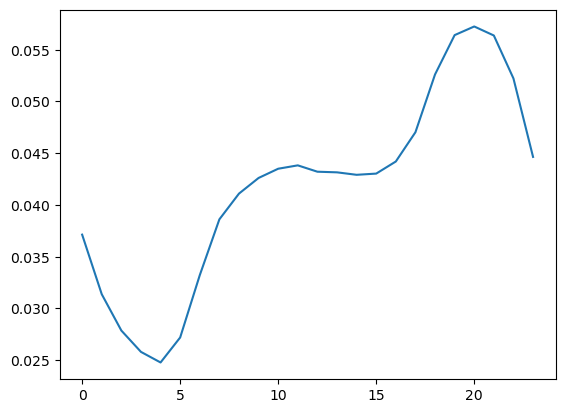

In [16]:
(df.review_timestamp + timedelta(hours=5)).dt.hour.value_counts(normalize=True).sort_index().plot()

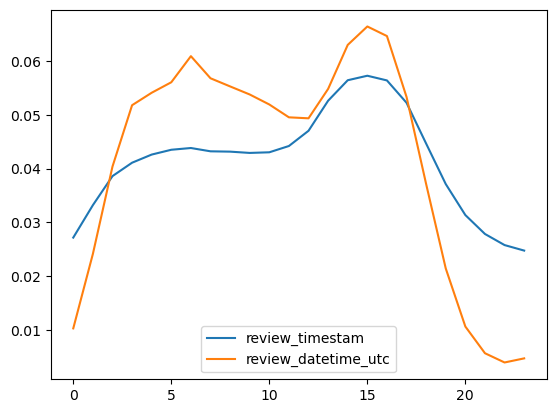

In [17]:
df.review_timestamp.dt.hour.value_counts(normalize=True).sort_index().plot()
df.review_datetime_utc.dt.hour.value_counts(normalize=True).sort_index().plot()
plt.legend(["review_timestam", "review_datetime_utc"])
plt.show()

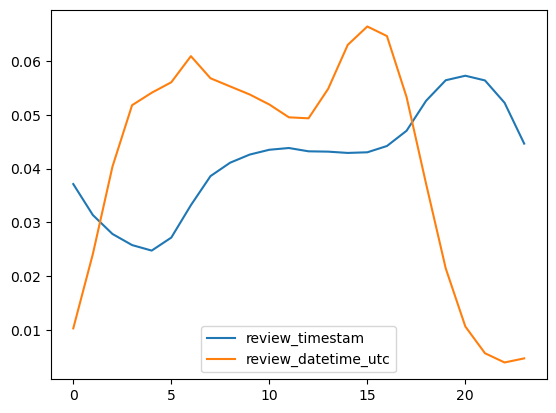

In [18]:
(df.review_timestamp + timedelta(hours=5)).dt.hour.value_counts(normalize=True).sort_index().plot()
df.review_datetime_utc.dt.hour.value_counts(normalize=True).sort_index().plot()
plt.legend(["review_timestam", "review_datetime_utc"])
plt.show()

In [19]:
df.review_datetime_utc = df.review_datetime_utc.dt.tz_localize(None)
df.review_datetime_utc += timedelta(hours=5)
df.review_timestamp += timedelta(hours=5)

In [20]:
df.review_timestamp = df.review_timestamp.fillna(df.review_datetime_utc)
df = df.drop("review_datetime_utc", axis=1)

<Axes: >

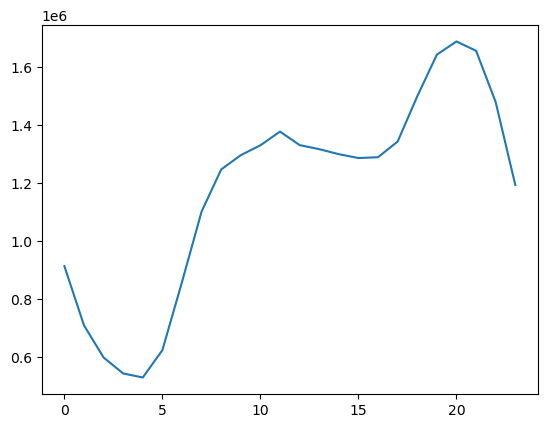

In [21]:
df.review_timestamp.dt.hour.value_counts().sort_index().plot()

In [22]:
df.head()

,review_id,app_name,author_name,pseudo_author_id,author_app_version,review_rating,review_likes,review_timestamp
0,ff27dd54-d785-418f-998c-8c2e01351201,WHATSAPP_REVIEWS,VI*******AR,232289234882626103787,2.21.23.23,5.0,0,2021-11-25 08:12:29
1,08e30530-c0fe-4a94-86d3-cc2ddb08b66b,WHATSAPP_REVIEWS,Ha************an,165667818870073259663,2.21.10.16,5.0,0,2021-11-25 08:12:37
2,f6077a17-bcc3-4445-b23e-15d292f217b9,WHATSAPP_REVIEWS,Ar******77,235241404052650920045,2.21.21.19,1.0,0,2021-11-25 08:12:55
3,6ac91332-f85e-488f-8538-3d50f803f22b,WHATSAPP_REVIEWS,Na************* U,217415827699074437622,2.21.10.16,5.0,0,2021-11-25 08:12:59
4,8eaf12b4-386e-4ca3-a5b4-6dd45e051b54,WHATSAPP_REVIEWS,or*****************ne,326804115988587106741,2.21.22.26,5.0,0,2021-11-25 08:12:59


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28154385 entries, 0 to 3465865
Data columns (total 8 columns):
 #   Column              Dtype         
---  ------              -----         
 0   review_id           object        
 1   app_name            object        
 2   author_name         object        
 3   pseudo_author_id    object        
 4   author_app_version  object        
 5   review_rating       float64       
 6   review_likes        int64         
 7   review_timestamp    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 1.9+ GB


In [24]:
df.to_parquet("./target_raw.parquet")

In [25]:
df.groupby("app_name")["review_rating"].mean()

app_name
FACEBOOK_REVIEWS     3.169134
FLIPKART_REVIEWS     4.322431
INSTAGRAM_REVIEWS    3.931349
SPOTIFY_REVIEWS      4.043836
TIKTOK_REVIEWS       4.276736
TWITTER_REVIEWS      3.835051
WHATSAPP_REVIEWS     3.995535
Name: review_rating, dtype: float64